<a href="https://colab.research.google.com/github/tal098123/final_project_cs/blob/main/Copy_of_Assignment2_supervised_learning_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1:Karina 2973
# student 2:Eden 7211

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate,KFold,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_dataSet(trainSet,testSet):
     df_tr=pd.read_csv('/content/drive/MyDrive/'+trainSet)
     df_ts=pd.read_csv('/content/drive/MyDrive/'+testSet)
     return df_tr,df_ts

In [ ]:

train='housing_train.csv'
test='housing_test.csv'
df_trainset,df_testset =load_dataSet(train,test)
display(df_trainset.head())
display(df_testset.head())





,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [ ]:
df_trainset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


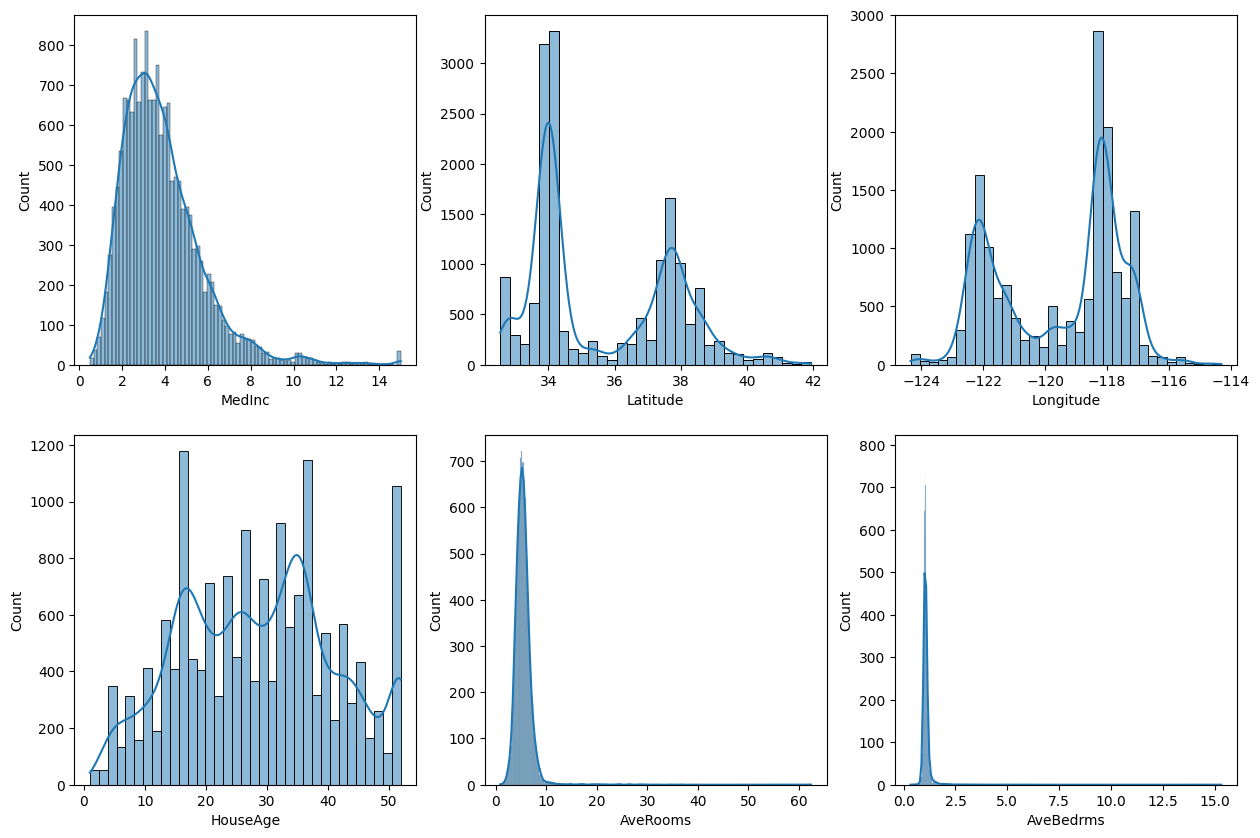

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig,axes=plt.subplots(2,3,figsize=(15,10))
sns.histplot(data=df_trainset,x="MedInc",kde=True,ax=axes[0,0])
sns.histplot(data=df_trainset,x="Latitude",kde=True,ax=axes[0,1])
sns.histplot(data=df_trainset,x="Longitude",kde=True,ax=axes[0,2])
sns.histplot(data=df_trainset,x="HouseAge",kde=True,ax=axes[1,0])
sns.histplot(data=df_trainset,x="AveRooms",kde=True,ax=axes[1,1])
sns.histplot(data=df_trainset,x="AveBedrms",kde=True,ax=axes[1,2])
plt.show()

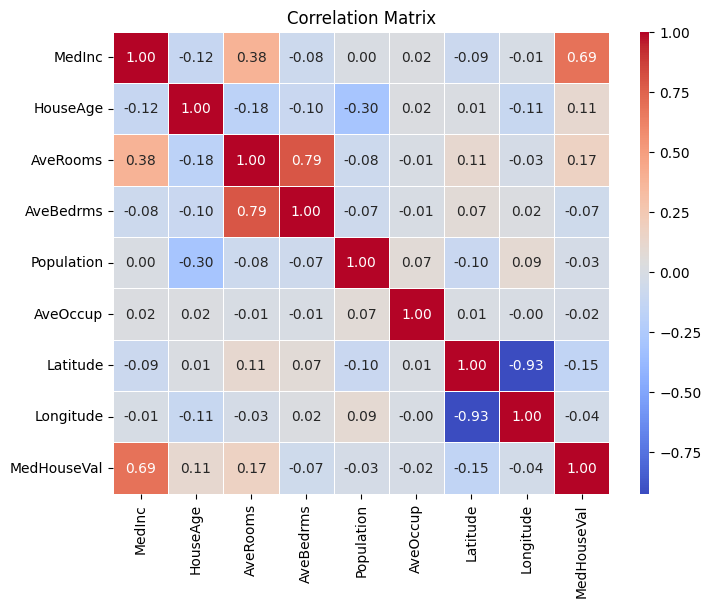

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(df_trainset.corr(), annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5,cbar_kws={"aspect": 50})
plt.title('Correlation Matrix')
plt.show()


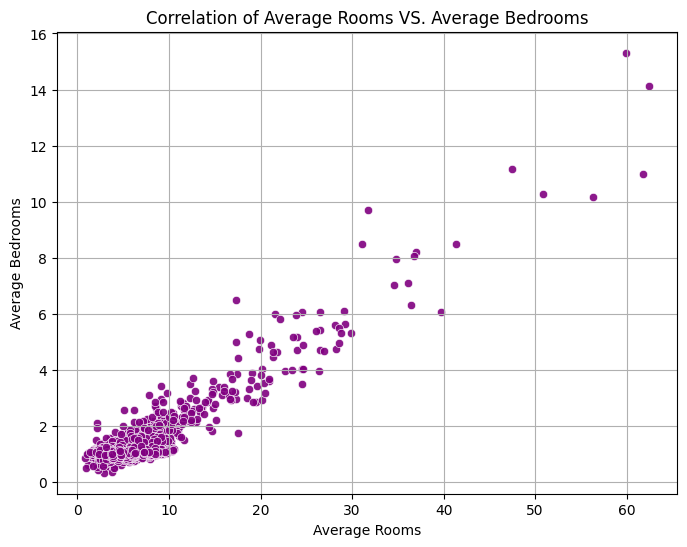

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AveRooms', y='AveBedrms', data=df_trainset, alpha=0.9, color='purple')
plt.title('Correlation of Average Rooms VS. Average Bedrooms')
plt.xlabel('Average Rooms')
plt.ylabel('Average Bedrooms')
plt.grid(True)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
#baseline
x_train = df_trainset.drop('MedHouseVal', axis=1)
y_train = df_trainset['MedHouseVal']
print("Linear Regression Mean R^2:",np.mean(cross_val_score(LinearRegression(),x_train,y_train,cv=5,scoring='r2')))
print("Ridge Regression Mean R^2:",np.mean(cross_val_score(Ridge(),x_train,y_train,cv=5,scoring='r2')))
print("Lasso Regression Mean R^2:",np.mean(cross_val_score(Lasso(),x_train,y_train,cv=5,scoring='r2')))
print("Desicion Tree Regressor Mean R^2:",np.mean(cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=5,scoring='r2')))

Linear Regression Mean R^2: 0.6048238023221039
Ridge Regression Mean R^2: 0.6048305388758054
Lasso Regression Mean R^2: 0.2771010475605773
Desicion Tree Regressor Mean R^2: 0.5770883189713636


In [ ]:
#feature engeneering
data=df_trainset.copy()

In [ ]:
def new_features(df):
    df['PopuDens']=df['Population']/df['AveOccup']
    df['RmsPerPers']=df['AveRooms']/df['AveOccup']
    df['BedrmsPerHousehold']=df['AveBedrms']/df['AveOccup']
    return df

In [ ]:
data=new_features(data)
data.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PopuDens,RmsPerPers,BedrmsPerHousehold
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267,499.425448,1.972053,0.401982
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219,384.305769,1.041336,0.218045
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,2.000000,0.002547,0.000670
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000,279.000000,1.525730,0.315565
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000,410.000000,1.937829,0.372213
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000,603.250000,2.294979,0.442587
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010,6082.000000,41.333333,8.750000


In [ ]:
x_train=data
print("difference with added columns:")
print("Linear Regression Mean R^2:",np.mean(cross_val_score(LinearRegression(),x_train,y_train,cv=5,scoring='r2')))
print("Ridge Regression Mean R^2:",np.mean(cross_val_score(Ridge(),x_train,y_train,cv=5,scoring='r2')))
print("Lasso Regression Mean R^2:",np.mean(cross_val_score(Lasso(),x_train,y_train,cv=5,scoring='r2')))
print("Desicion Tree Regressor Mean R^2:",np.mean(cross_val_score(DecisionTreeRegressor(),x_train,y_train,cv=5,scoring='r2')))

difference with added columns:
Linear Regression Mean R^2: 1.0
Ridge Regression Mean R^2: 0.999999990326633
Lasso Regression Mean R^2: 0.38919681857164246
Desicion Tree Regressor Mean R^2: 0.99999773150198


In [ ]:
#Expirementing with different Models

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()),
    ('regressor', Ridge())
])

param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'polynomialfeatures__degree': [1, 2, 3],
        'regressor': [Ridge()],
        'regressor__alpha': [0.01, 0.1, 1, 10]
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'polynomialfeatures__degree': [1, 2, 3],
        'regressor': [Lasso()],
        'regressor__alpha': [0.01, 0.1, 1, 10],
        'regressor__max_iter':[5000,10000]
    },
    {
        'scaler': [StandardScaler()],
        'polynomialfeatures__degree': [1],
        'regressor': [DecisionTreeRegressor()],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10]
    }
]


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_


print(f"Best parameters: {best_params}")
print(f"Best R² score: {best_score}")

results = grid_search.cv_results_

#collacting results of diffrent models
ridge_best = {
    'mean_test_score': results['mean_test_score'][0],
    'param_regressor__alpha': results['param_regressor__alpha'][0],
    'param_scaler': results['param_scaler'][0]
}

lasso_best = {
    'mean_test_score': results['mean_test_score'][20],
    'param_regressor__alpha': results['param_regressor__alpha'][20],
    'param_scaler': results['param_scaler'][20]
}
tree_best = {
    'mean_test_score': results['mean_test_score'][40],
    'param_scaler': results['param_scaler'][40]
}



Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters: {'polynomialfeatures__degree': 1, 'regressor': Ridge(), 'regressor__alpha': 0.01, 'scaler': StandardScaler()}
Best R² score: 0.9999999999983006


In [ ]:
results = {
    'Model': ['Ridge Regression', 'Lasso Regression', 'Decision Tree Regression'],
    'Mean R^2': [ridge_best['mean_test_score'], lasso_best['mean_test_score'], tree_best['mean_test_score']],
    'Best R^2': [ridge_best['mean_test_score'], lasso_best['mean_test_score'], tree_best['mean_test_score']],
    'Best Regressor__Alpha': [
        ridge_best.get('param_regressor__alpha', 'N/A'),
        lasso_best.get('param_regressor__alpha', 'N/A'),   'N/A'  ],
    'Scaler': [ridge_best['param_scaler'], lasso_best['param_scaler'], tree_best['param_scaler']]
}

results_df = pd.DataFrame(results)

In [ ]:
#displaying diffrent outcomes
display(results_df)

,Model,Mean R^2,Best R^2,Best Regressor__Alpha,Scaler
0,Ridge Regression,1.000000,1.000000,0.01,StandardScaler()
1,Lasso Regression,0.950205,0.950205,1,StandardScaler()
2,Decision Tree Regression,0.999924,0.999924,N/A,StandardScaler()


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:

X = x_train
y = df_trainset['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures(degree=1)),
    ('regressor', Ridge(alpha=0.01))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score on test set: {r2}")


R² score on test set: 0.9999999999984107


## Part 5 - Apply on test and show model performance estimation

In [ ]:
X = df_testset.drop('MedHouseVal', axis=1)
y = df_testset['MedHouseVal']

# Train-test split to get y pred an actual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures(degree=1)),  # Linear model since degree=1
    ('regressor', Ridge(alpha=0.01))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Five first predictions on TEST SET:")
for i in range(5):
    print(f"Example {i+1}: Prediction = {y_pred[i]}, Actual = {y_test.iloc[i]}")


r2 = r2_score(y_test, y_pred)
print(f"R² score on test set: {r2}")


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Five first predictions on TEST SET:
Example 1: Prediction = 2.317426967177919, Actual = 1.978
Example 2: Prediction = 1.5656342404481784, Actual = 1.417
Example 3: Prediction = 1.2182300360883835, Actual = 0.926
Example 4: Prediction = 2.134492379032923, Actual = 2.567
Example 5: Prediction = 1.987894336313747, Actual = 2.171
R² score on test set: 0.6270833854856335
Mean Absolute Error (MAE): 0.535942260585686
Root Mean Squared Error (RMSE): 0.7073902560321792
